<a href="https://colab.research.google.com/github/dariRusAG/MachineLearning/blob/main/%D0%9C%D0%B5%D1%82%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D0%919119_09_03_04%D0%BF%D1%80%D0%BE%D0%B3%D0%B8%D0%BD(1)_%D0%90%D0%B3%D0%B0%D0%BF%D0%BE%D0%B2%D0%B0_%D0%94%D0%B0%D1%80%D1%8C%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1. Метрические методы классификации

1. Задание выполнить в среде Google Colaboratory, сдать в Teams данный файл.
2. Использовать выбранную и закрепленную за вами выборку данных (датасет).
3. Разбить выборку на обучающую и контрольную в пропорциях 80%-20% или 70%-30%.
4. Для метода k ближайших соседей настроить параметр "Число ближайших соседей" (k).
5. Для метода окна Парзена настроить параметр "Ширина окна" (h).
6. Рекомендуется визуализировать результаты проведения экспериментов.
7. Материалы: [Машинное обучение (курс лекций, К.В. Воронцов). Метрические методы](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_(%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9,_%D0%9A.%D0%92.%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D1%86%D0%BE%D0%B2)#.D0.9C.D0.B5.D1.82.D1.80.D0.B8.D1.87.D0.B5.D1.81.D0.BA.D0.B8.D0.B5_.D0.BC.D0.B5.D1.82.D0.BE.D0.B4.D1.8B_.D0.BA.D0.BB.D0.B0.D1.81.D1.81.D0.B8.D1.84.D0.B8.D0.BA.D0.B0.D1.86.D0.B8.D0.B8_.D0.B8_.D1.80.D0.B5.D0.B3.D1.80.D0.B5.D1.81.D1.81.D0.B8.D0.B8)

## Выполнил студент

Агапова Дарья Руслановна

Б9119-09.03.04прогин(1)

## Библиотеки

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np

from sklearn.datasets import make_classification, load_iris, load_wine
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, ParameterGrid, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KernelDensity
from sklearn.base import BaseEstimator, ClassifierMixin

from mlxtend.plotting import plot_decision_regions

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Подключение выборки данных

In [ ]:
# Файловый способ подключения выборки данных
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/MMO/segmentation.csv', names=["CLASSES", "REGION-CENTROID-COL", "REGION-CENTROID-ROW", "REGION-PIXEL-COUNT", "SHORT-LINE-DENSITY-5", "SHORT-LINE-DENSITY-2", "VEDGE-MEAN", "VEDGE-SD", "HEDGE-MEAN", "HEDGE-SD", "INTENSITY-MEAN", "RAWRED-MEAN", "RAWBLUE-MEAN", "RAWGREEN-MEAN", "EXRED-MEAN", "EXBLUE-MEAN", "EXGREEN-MEAN", "VALUE-MEAN", "SATURATION-MEAN", "HUE-MEAN"], sep=";")

X = data[data.columns[1:]]
Y = data[data.columns[0]]

Mounted at /content/drive


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                    test_size = 0.3,   # Процент элементов в контрольной выборке
                                                    random_state = 0)  # Фиксация разбиения на обучение и контроль

## Метод ближайшего соседа (1NN)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Доля правильных ответов метода
print('Обучающая выборка   : ', model.score(X_train, Y_train))
print('Контрольная выборка : ', model.score(X_test, Y_test))
print('Процент ошибок на обучение : ', (1 - model.score(X_train, Y_train)) * 100, '%')
print('Процент ошибок на контроле : ', (1 - model.score(X_test, Y_test)) * 100, '%')

Обучающая выборка   :  1.0
Контрольная выборка :  0.948051948051948
Процент ошибок на обучение :  0.0 %
Процент ошибок на контроле :  5.1948051948051965 %


## Метод k-ближайших соседей (KNN)

K	 Обучение		 Контроль
1 	 1.0			 0.948051948051948
2 	 0.9789734075448361	 0.9336219336219336
3 	 0.9696969696969697	 0.9206349206349206
4 	 0.9672232529375386	 0.9206349206349206
5 	 0.9653679653679653	 0.9191919191919192
6 	 0.9579468150896723	 0.9018759018759018
7 	 0.9523809523809523	 0.911976911976912
8 	 0.9443413729128015	 0.9148629148629148
9 	 0.9418676561533704	 0.911976911976912
10 	 0.9406307977736549	 0.9148629148629148
11 	 0.9344465058750773	 0.9047619047619048
12 	 0.9294990723562152	 0.9033189033189033
13 	 0.9276437847866419	 0.9033189033189033
14 	 0.9251700680272109	 0.9004329004329005
15 	 0.9233147804576376	 0.8946608946608947
16 	 0.9233147804576376	 0.8917748917748918
17 	 0.9189857761286333	 0.8932178932178932
18 	 0.9202226345083488	 0.8917748917748918
19 	 0.9140383426097711	 0.8888888888888888
Лучшее число соседей (k)   : 1
Процент ошибок на обучении : 0.0 %
Процент ошибок на контроле : 5.1948051948051965 %


Text(0, 0.5, 'Частота правильных ответов')

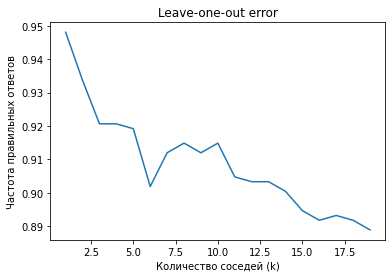

In [ ]:
print('K\t', 'Обучение\t\t', 'Контроль');

models = []
train_accuracy = []
test_accuracy = []
max_k = 20
for n_neighbors in range(1, max_k):
    model = KNeighborsClassifier(n_neighbors = n_neighbors)
    model.fit(X_train, Y_train)
    models.append(model)
    print(n_neighbors, '\t', model.score(X_train, Y_train), end = '')
    a = str(model.score(X_train, Y_train))
    if len(a) < 15:
        print('\t\t', end = '')
    print('\t', model.score(X_test, Y_test))   
    train_accuracy.append(model.score(X_train, Y_train))
    test_accuracy.append(model.score(X_test, Y_test))
best_k = test_accuracy.index(max(test_accuracy)) + 1
print('Лучшее число соседей (k)   :', best_k)
print('Процент ошибок на обучении :', (1-train_accuracy[best_k - 1]) * 100, '%')
print('Процент ошибок на контроле :', (1-test_accuracy[best_k - 1]) * 100, '%')
plt.plot(range(1,20),test_accuracy)
plt.title('Leave-one-out error')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Частота правильных ответов')

### Метод k-ближайших соседей (KNN) в цикле

In [ ]:
for i in range(10):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                    test_size = 0.3,   # Процент элементов в контрольной выборке
                                                    random_state = i)  # Фиксация разбиения на обучение и контроль
  models = []
  train_accuracy = []
  test_accuracy = []
  max_k = 20
  for n_neighbors in range(1, max_k):
      model = KNeighborsClassifier(n_neighbors = n_neighbors)
      model.fit(X_train, Y_train)
      models.append(model)
      train_accuracy.append(model.score(X_train, Y_train))
      test_accuracy.append(model.score(X_test, Y_test))
  plt.plot(range(1,20),test_accuracy)
  plt.title('Leave-one-out error')
  plt.xlabel('Количество соседей (k)')
  plt.ylabel('Частота правильных ответов')

NameError: ignored

## Метод окна Парзена (Parzen)

K	 Обучение		 Контроль
1 	 1.0			 0.9018759018759018
2 	 1.0			 0.9321789321789322
3 	 0.9987631416202845	 0.9494949494949495
4 	 0.9975262832405689	 0.9538239538239538
5 	 0.9950525664811379	 0.948051948051948
6 	 0.9925788497217068	 0.9538239538239538
7 	 0.9901051329622759	 0.9552669552669553
8 	 0.9882498453927026	 0.9552669552669553
9 	 0.9845392702535559	 0.9552669552669553
10 	 0.9826839826839827	 0.9494949494949495
11 	 0.9734075448361162	 0.9408369408369408
12 	 0.9653679653679653	 0.9307359307359307
13 	 0.9598021026592455	 0.9235209235209235
14 	 0.948051948051948	 0.9062049062049062
15 	 0.935064935064935	 0.898989898989899
16 	 0.9282622139764997	 0.8903318903318903
17 	 0.9189857761286333	 0.8874458874458875
18 	 0.9059987631416203	 0.8831168831168831
19 	 0.8948670377241806	 0.8744588744588745
20 	 0.8837353123067409	 0.8672438672438673
21 	 0.8744588744588745	 0.862914862914863
22 	 0.8695114409400123	 0.8585858585858586
23 	 0.8614718614718615	 0.8528138528138528
24 	 

Text(0, 0.5, 'Частота правильных ответов')

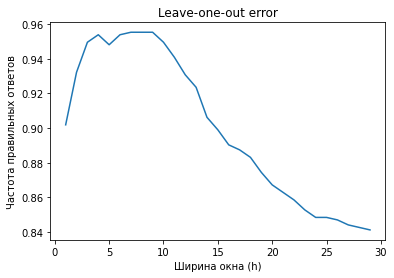

In [ ]:
class KDEClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, bandwidth = 1.0, kernel = 'gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self
        
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims = True)
        
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

print('K\t', 'Обучение\t\t', 'Контроль', end = '')
print()
train_accuracy = []
test_accuracy = []
max_h = 30
for i in range(1, max_h):
  model = KDEClassifier(bandwidth = i)
  model.fit(X_train, Y_train)
  models.append(model)
  train_accuracy.append(model.score(X_train, Y_train))
  print(i, '\t', model.score(X_train, Y_train), end = '')
  a = str(model.score(X_train, Y_train))
  if len(a) < 15:
      print('\t\t', end = '')
  test_accuracy.append(model.score(X_test, Y_test))
  print('\t', model.score(X_test, Y_test))    
best_h = test_accuracy.index(max(test_accuracy)) + 1
print('Лучшая ширина окна (h)     : ', best_h)
print('Процент ошибок на обучении : ', (1-train_accuracy[best_h - 1]) * 100, '%')
print('Процент ошибок на контроле : ', (1-test_accuracy[best_h - 1]) * 100, '%')
plt.plot(range(1,30),test_accuracy)
plt.title('Leave-one-out error')
plt.xlabel('Ширина окна (h)')
plt.ylabel('Частота правильных ответов')

### Метод окна Парзена (Parzen) в цикле

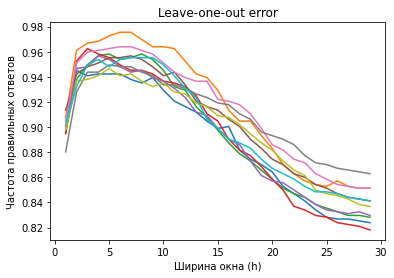

In [ ]:
class KDEClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, bandwidth = 1.0, kernel = 'gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self
        
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims = True)
        
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

for i in range(10):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                    test_size = 0.3,   # Процент элементов в контрольной выборке
                                                    random_state = i)  # Фиксация разбиения на обучение и контроль
  train_accuracy = []
  test_accuracy = []
  max_h = 30
  for i in range(1, max_h):
    model = KDEClassifier(bandwidth = i)
    model.fit(X_train, Y_train)
    models.append(model)
    train_accuracy.append(model.score(X_train, Y_train))
    test_accuracy.append(model.score(X_test, Y_test)) 
  plt.plot(range(1,30),test_accuracy)
  plt.title('Leave-one-out error')
  plt.xlabel('Ширина окна (h)')
  plt.ylabel('Частота правильных ответов')

---

##Заключение

###1. Выборка данных (датасет)

* Ссылка на выборку: https://archive.ics.uci.edu/ml/datasets/Image+Segmentation
* Описание выборки: экземпляры выбраны случайным образом из базы данных 7 наружных изображений. Изображения были сегментированы вручную, чтобы создать классификацию для каждого пикселя. Каждый экземпляр представляет собой регион размером 3x3. Задача состоит в определении класса экземпляра.
* Количество классов: 7
* Количество признаков: 19
* Количество объектов: 2310

###2. Метод ближайшего соседа (1NN)

Описание эксперимента: алгоритм присваивает любому новому наблюдению метку класса ближайшего объекта. 

Результаты эксперимента:
* Процент ошибок на обучении: 0
* Процент ошибок на контроле: 5

###3. Метод k ближайших соседей (KNN)

Работа алгоритма: 
- Относит объект к тому классу, у которого максимальна сумма весов его ближайших k соседей.
- Вес зависит только от номера соседа.

Описание эксперимента: алгоритм ищет лучшее количество соседей k (такое, чтобы сохранить компромисс между точностью и обобщающей способностью модели) на обучающей выборке, затем на контрольной выборке присваивает любому новому наблюдению метку класса k ближайших соседей-объектов.

Результаты эксперимента:
* Лучшее количество соседей: 1
* Процент ошибок на обучении: 0
* Процент ошибок на контроле: 5

###4. Метод окна Парзена (Parzen)

Работа алгоритма: 
- Относит объект к тому классу, у которого максимальна сумма весов соседей, входящих в ограниченную область.
- Весовая функция определяется как функция от расстояния между классифицируемым объектом и его соседями.

Описание эксперимента: алгоритм ищет лучшую ширину окна h (дальше которой объекты рассматриваться не будут) на обучающей выборке, затем на контрольной выборке присваивает любому новому наблюдению метку класса соседей, входящих в ширину h.

Результаты эксперимента:
* Лучшая ширина окна: 7
* Процент ошибок на обучении: 1
* Процент ошибок на контроле: 4

###5. Вывод

Лучший результат продемонстрировал метод окна Парзена - наименьший процент ошибок на контроле.